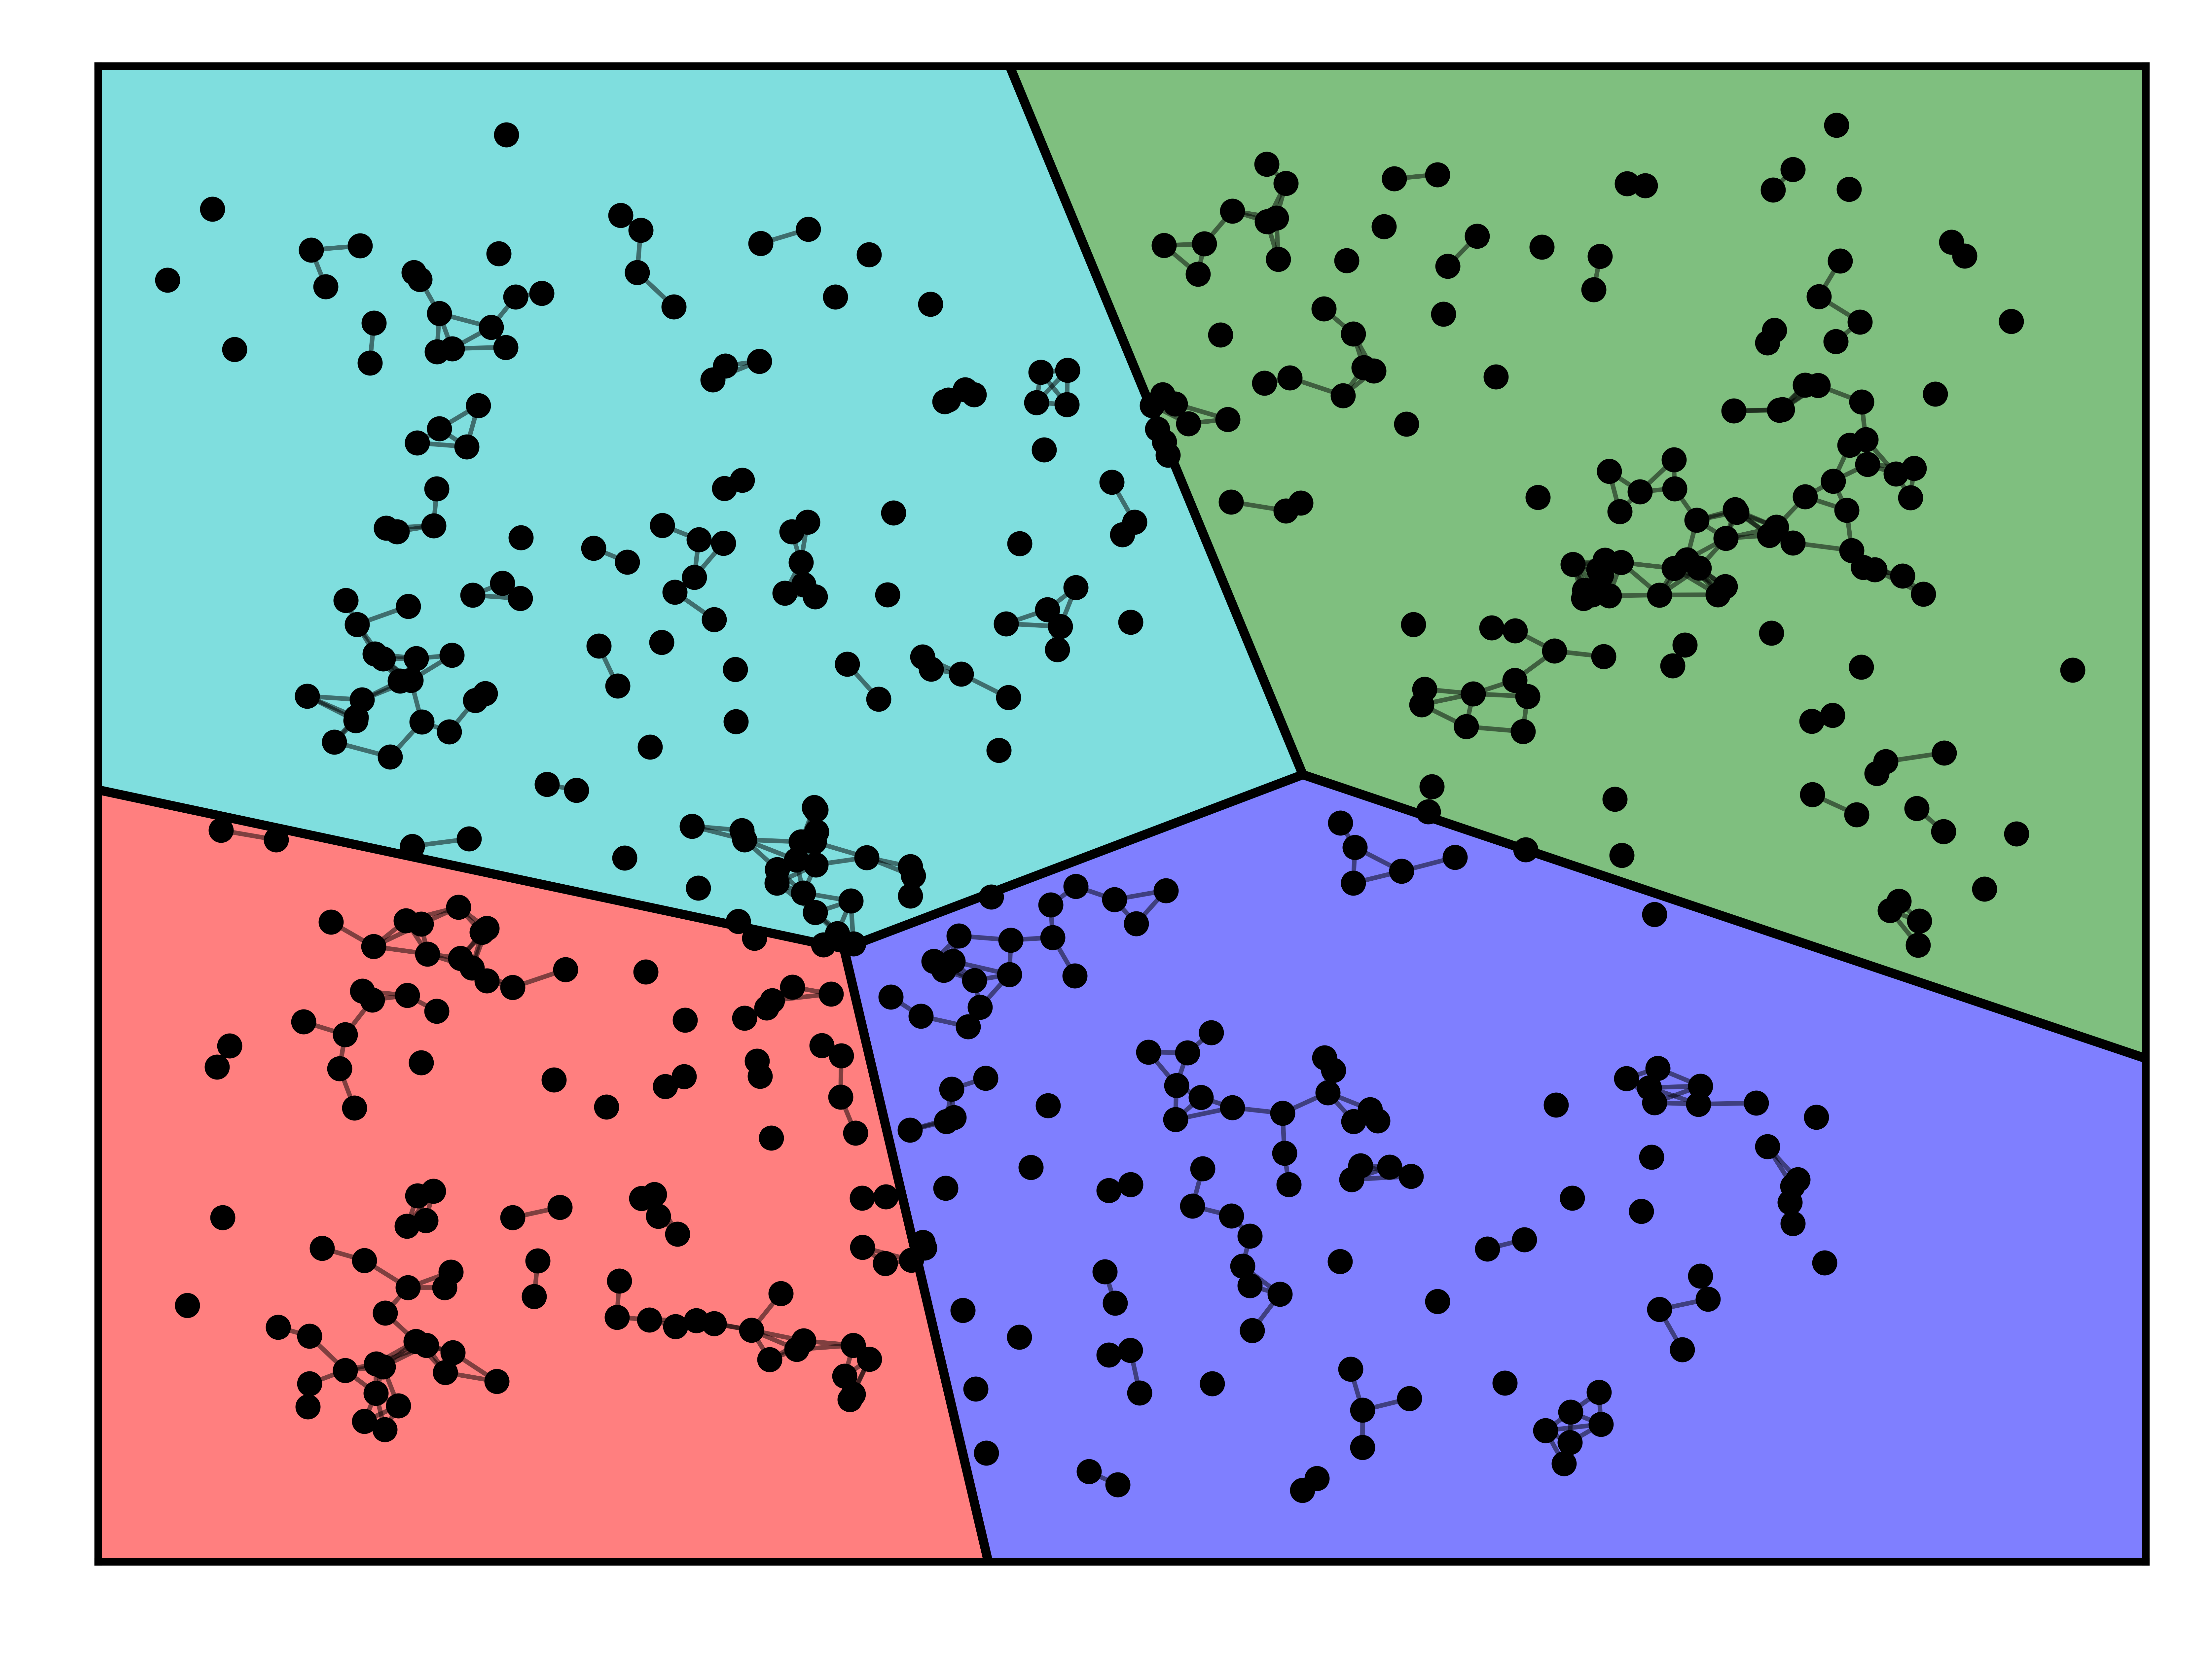

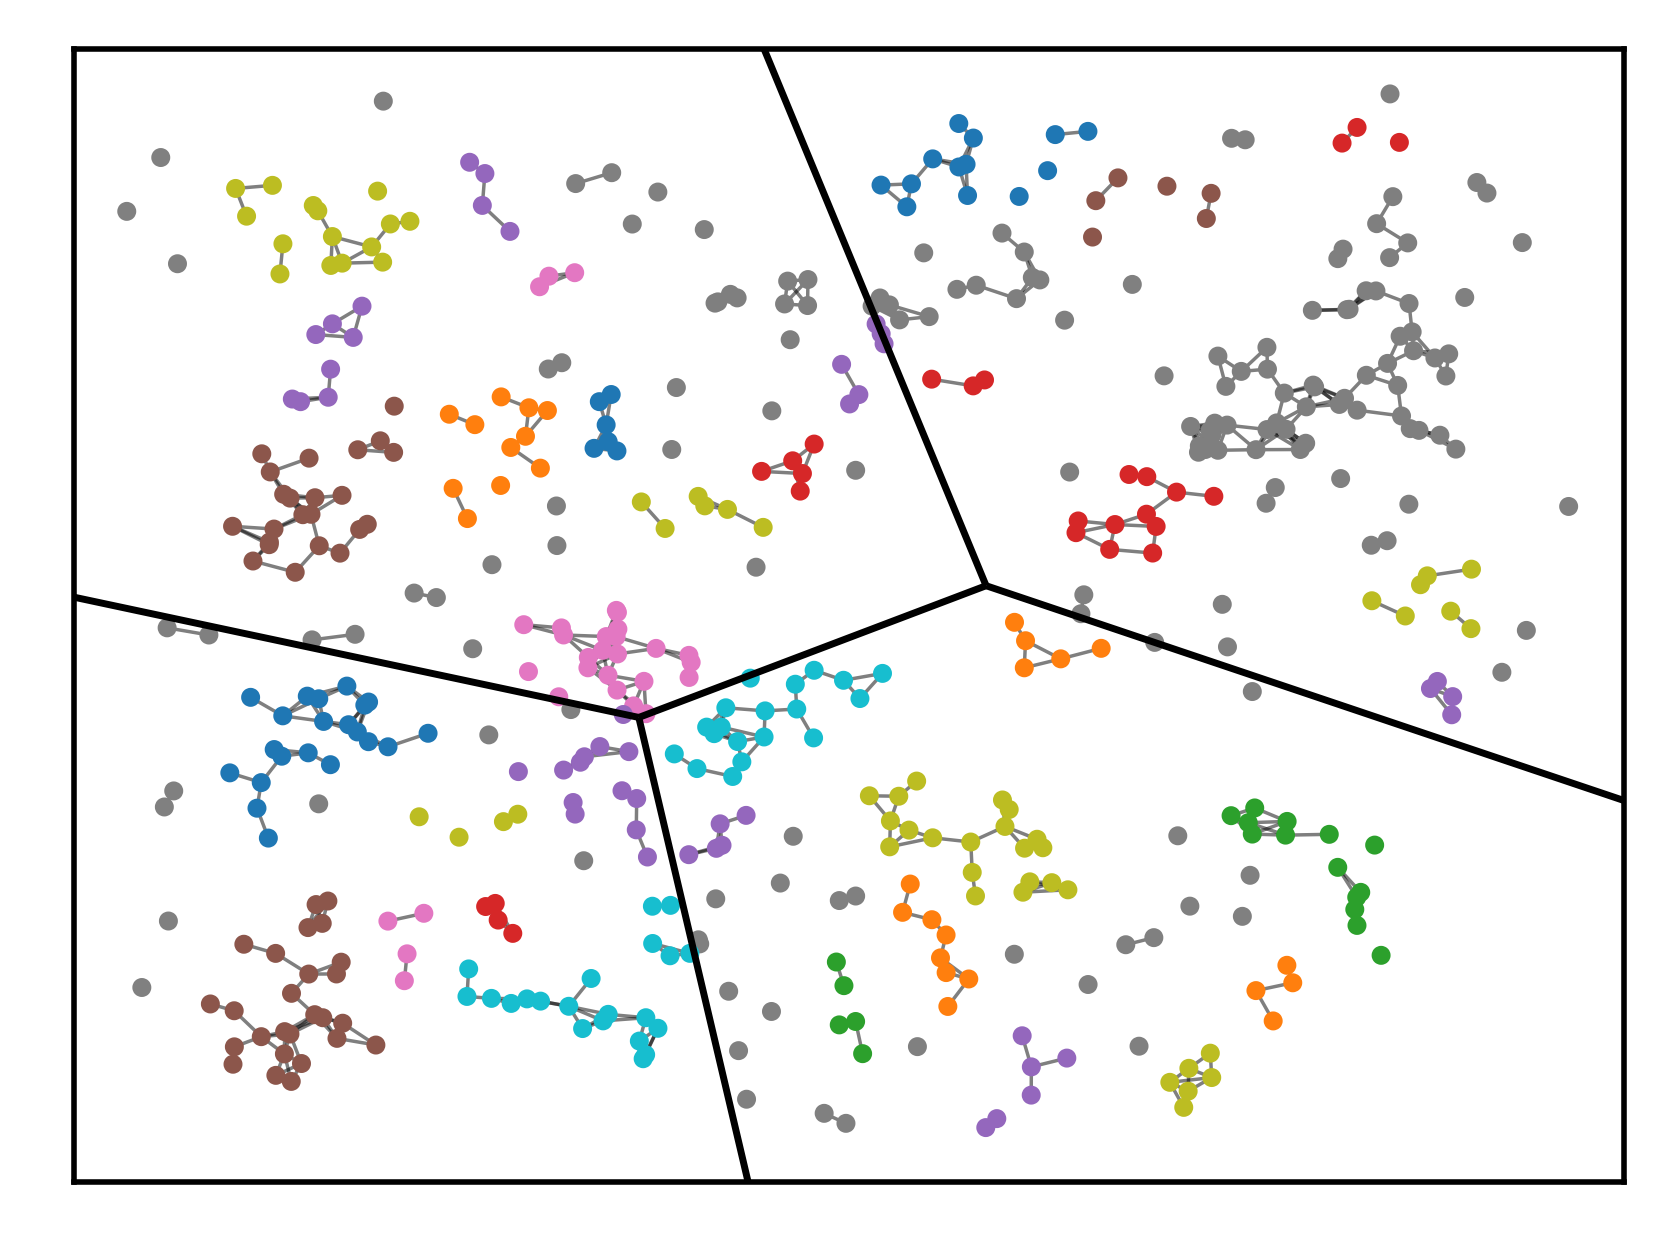

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import itertools

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d, distance
from matplotlib.colors import TABLEAU_COLORS

from sklearn.cluster import DBSCAN

dpi = 2000

X, clusters = make_blobs(
    n_samples = 500,
    n_features = 2, 
    centers = 100,
    cluster_std = 0.7,
    shuffle = True
    )

fig, ax = plt.subplots(figsize=(4,3), dpi=dpi)
# ax.scatter(features[:,0],features[:,1])

kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=0, max_iter=1) 
kmeans.fit(X) 
y_kmeans = kmeans.predict(X) # cluster index for each observation 
centers = kmeans.cluster_centers_ # cluster center coordinates 
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='summer') 
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

centers = np.append(centers, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.scatter(X[:,0], X[:,1], c="black", s=3)

ax.set_xlim([-12,12]) 
ax.set_ylim([-12,12])

fig.savefig("tcrspace.png", format="png")

vor = Voronoi(centers)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_width=1, s=1, ax = ax)

# order = df_3['phi6']
count = 0
colors = ["b","g","r","c","m"]
for region in vor.regions:
    if not -1 in region:
        if len(region) > 0:
            polygon = [vor.vertices[i] for i in region]
            ax.fill(*zip(*polygon), alpha=0.5, c=colors[count],zorder=0)
            count += 1
            
ax.set_xlim([-12,12]) 
ax.set_ylim([-12,12])
            
fig.savefig("tcrspace_vor.png", format="png")

for k in np.unique(y_kmeans):
    sub = X[np.where(y_kmeans==k)[0].tolist(),:]
    combs = [i for i in itertools.combinations(sub.tolist(), 2)]
    for pair in combs:
        pair = np.array(pair)
        x = pair[:,0]
        y = pair[:,1]
        a = pair[0,:]
        b = pair[1,:]
        if distance.euclidean(a,b) < .7:    
            ax.plot(x, y, c="black", lw=.5, alpha=.5)
            
ax.set_xlim([-12,12]) 
ax.set_ylim([-12,12])

fig.savefig("tcrspace_vor_net.png", format="png")

#####################################################################################

df = pd.DataFrame(X, columns=["x_coord","y_coord"])
df["preclust"] = y_kmeans

fig, ax = plt.subplots(figsize=(4,3), dpi=dpi)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_width=1, s=1, ax = ax)

for pc in df.preclust.unique():

    sub = df[df["preclust"]==pc][["x_coord","y_coord"]]

    db = DBSCAN(eps=0.8, min_samples=3).fit(sub)
    labels = db.labels_
    sub["cluster"] = labels

    custom_cmap = {}
    for i in list(set(labels)):
        custom_cmap[i] = random.choice(list(TABLEAU_COLORS.keys()))

    custom_cmap[-1] = "grey"

    sub["color"] = sub["cluster"].map(custom_cmap)

    ax.scatter(sub.x_coord, sub.y_coord, c=sub["color"], s=3)
    
for k in np.unique(y_kmeans):
    sub = X[np.where(y_kmeans==k)[0].tolist(),:]
    combs = [i for i in itertools.combinations(sub.tolist(), 2)]
    for pair in combs:
        pair = np.array(pair)
        x = pair[:,0]
        y = pair[:,1]
        a = pair[0,:]
        b = pair[1,:]
        if distance.euclidean(a,b) < .7:    
            ax.plot(x, y, c="black", lw=.5, alpha=.5, zorder=0)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
    
ax.set_xlim([-12,12])
ax.set_ylim([-12,12])

fig.savefig("tcrspace_vor_net_clust.png", format="png")

# db = DBSCAN(eps=0.5, min_samples=2).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# fig, ax = plt.subplots(figsize=(4,3), dpi=150)
# ax.scatter(X[:,0], X[:,1], c=np.vectorize(custom_cmap.get)(labels), s=3)
# voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_width=1, s=1, ax = ax)

# for k in np.unique(y_kmeans):
#     sub = X[np.where(y_kmeans==k)[0].tolist(),:]
#     combs = [i for i in itertools.combinations(sub.tolist(), 2)]
#     for pair in combs:
#         pair = np.array(pair)
#         x = pair[:,0]
#         y = pair[:,1]
#         a = pair[0,:]
#         b = pair[1,:]
#         if distance.euclidean(a,b) < .7:    
#             ax.plot(x, y, c="black", lw=.5, alpha=.5)

# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)

# ax.set_xlim([-12,12])
# ax.set_ylim([-12,12])


In [2]:
fig.savefig("tcrspace_vor_net_clust.png", format="png", dpi=2000)